# Clustering

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## $K$-Means Clustering

In $K$-Means clustering, we begin with a dataset $X = \{x^1,\ldots,x^M\}$. The goal is to partition this dataset into $K$ *clusters*, where $K$ is a positive integer of our choosing.

To do so, we minimize a function on the space of *$K$-partitions* of $X$; The function is defined by:
$$
f(\mathcal{S}) = \sum_{j=1}^K \sum_{x \in S_j} \| x - \mu_j \|^2,
$$

### Toy Dataset

Let's create a toy dataset to try this out on. We'll use a built-in function from the `sklearn` package to generate some 'blobs'.

In [2]:
from sklearn.datasets import make_blobs

K = 2 # classes
N = 100 # in each class
dimension = 2 # Ambient dimension. Let's do this in the plane

# Create dataset X, together with 'ground truth' labels y indicating true clusters
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension, random_state=3)

Let's take a look at the data we generated.

In [3]:
print('Dataset:')
print(X)
print('Labels:')
print(y)

Dataset:
[[ 8.88195994e-01  4.41112448e+00]
 [ 3.67547163e-01  3.42549161e+00]
 [-4.21069087e+00 -1.25739072e+00]
 [ 5.85067996e-01  3.62268619e+00]
 [-2.16225458e+00  5.42814377e-01]
 [-3.83108938e+00  1.84312571e+00]
 [ 2.24942910e+00  4.31194285e+00]
 [ 1.89024377e+00  2.86941982e+00]
 [ 6.94373358e-01  4.31408682e+00]
 [ 9.20720453e-01  3.63576867e+00]
 [-4.70700019e-01  5.57158341e+00]
 [ 1.65912133e+00  4.41204316e+00]
 [ 1.81718201e-01  5.50794891e+00]
 [-5.46813455e+00 -9.27169722e-01]
 [ 4.70598104e-01  2.61647914e+00]
 [ 6.59687292e-01  2.41981542e+00]
 [-3.11468967e+00  8.57972760e-01]
 [-6.12697748e+00 -9.43170847e-01]
 [-3.76352420e+00 -6.75854231e-01]
 [-1.01443550e+00  3.20218134e+00]
 [ 2.02914149e+00  5.01575429e+00]
 [-4.09694116e+00  1.31433159e+00]
 [-4.10281303e+00 -7.48211363e-01]
 [-4.09087071e+00  1.00198435e+00]
 [-2.28165277e-01  3.53653954e+00]
 [ 1.85180195e+00  4.65507536e+00]
 [-4.40122731e-03  4.43354988e+00]
 [ 2.12414555e+00  5.28234711e+00]
 [ 8.185433

So `X` is an array. Each row is a point in $\mathbb{R}^2$. The labels `y` are a list of 0's and 1's.

We can plot the data with the following syntax.

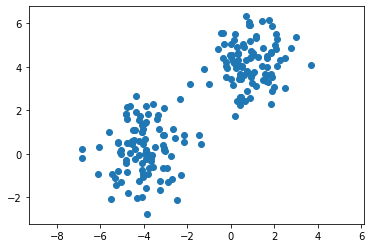

In [18]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

plt.show()

We can also plot the data with 'ground truth' colors to see what a perfect clustering algorithm should do.

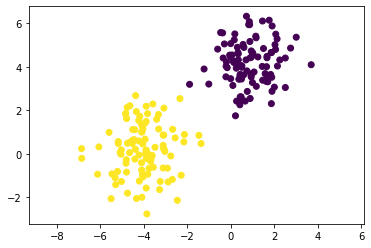

In [19]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.axis('equal')

plt.show()

### Solving $K$-Means

Now let's try find the minizing partition $\mathcal{S}$ of our dataset. The solution can be approximated by, for example, gradient descent. Let's use the implementation from the package `sklearn`.

**Extra Time/Check it out yourself later if interested:** At the end of this notebook, try implementing an approximation of $K$-means 'from scratch'---i.e., without calling `sklearn` package to solve it for us. 

In [20]:
# Import the KMeans algorithm from sklearn
from sklearn.cluster import KMeans

K = 2 # Choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

We can extract labels determined by this algorithm.

In [21]:
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1], dtype=int32)

The above describes the 'optimal' partition $\mathcal{S}$. That is, $\mathcal{S} = \{S_1,S_2\}$. If a point gets label $0$ in the list above then it belongs to (say) $S_1$, whereas if it gets label $1$ then it belongs to $S_2$.

We can also extract the *cluster centers*.

In [22]:
kmeans.cluster_centers_

array([[ 0.86365548,  4.17204079],
       [-4.03900883,  0.19275413]])

These are the optimal $\mu_1$ (first column) and $\mu_2$ (second column) from the definition of $K$-Means. 

Let's plot everything together: We'll plot our datset $X$, color its points by the labels above and we'll also plot the cluster centers on the same scatter plot.

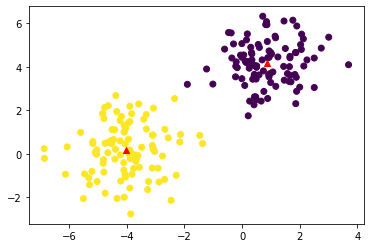

In [23]:
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

Looks good!

### Changing the Number of Clusters

$K$-Means requires us to choose a number of clusters. If we choose the wrong number of clusters, we get bad results! This is an issue if we are dealing with high-dimensional data with an unknown 'ground truth'---in practice, this would frequently be the case.


Let's change the $K$ parameter in what we did above and see what happens.

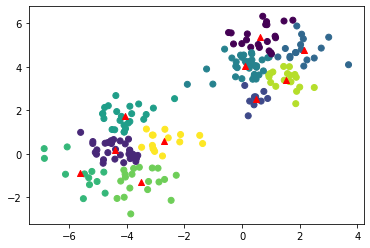

In [24]:
K = 10 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

Whichever $K$ we choose, we get some 'optimal' partition. If we don't choose $K$ correctly, this partition is not very meaningful. 

### Optional HW

Play around with the above code. Change parameters around to see what everything does. Going back to the beginning, you can change the dataset to have a different number of clusters or a different structure. One of the best ways to learn to code is to play with existing code in this way!

### Another Example --- 'Non Blobby' Data

Another issue with $K$-Means is that it's easy to construct datasets which the algorithm will not be able to handle.

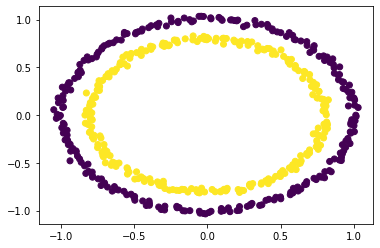

In [25]:
# Import another function for generating data
from sklearn.datasets import make_circles

X1, y1 = make_circles(n_samples=500, noise = 0.02, random_state = 2) 
# Some parameter choices here; feel free to tweak them

plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.show()

Since $K$-Means operates by taking Euclidean means, we anticipate that it cannot find the 'true' clustering structure, no matter how we choose $K$. Let's test this.

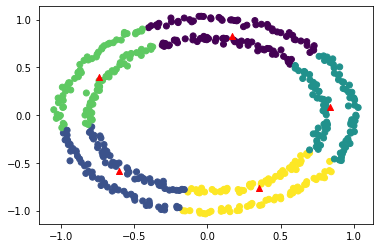

In [26]:
K = 5

kmeans = KMeans(n_clusters=K).fit(X1) # Changed the dataset to X1 here and in the next line
plt.scatter(X1[:,0],X1[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

## Summary: Issues with $K$-Means

We have observed the following issues:
- User must choose $K$. This might not always be obvious and *perhaps* there is not even a single true value for $K$. 
- By its nature, $K$-Means doesn't handle data which isn't 'blobby' very well.

There are workarounds for all of these issues ($K$-Means is very popular!), but we will introduce an alternative approach to which naturally overcomes them.

# Challenge 

In [1]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-nul

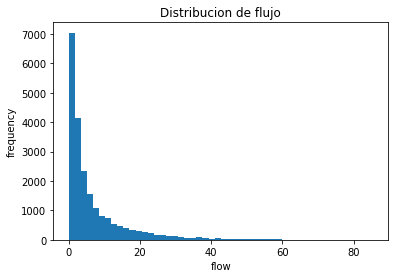

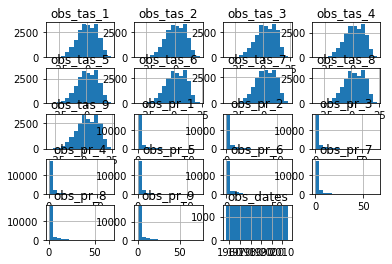

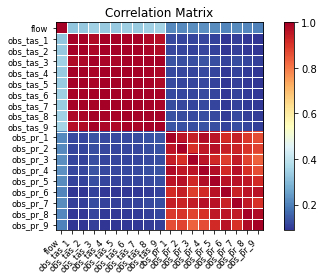

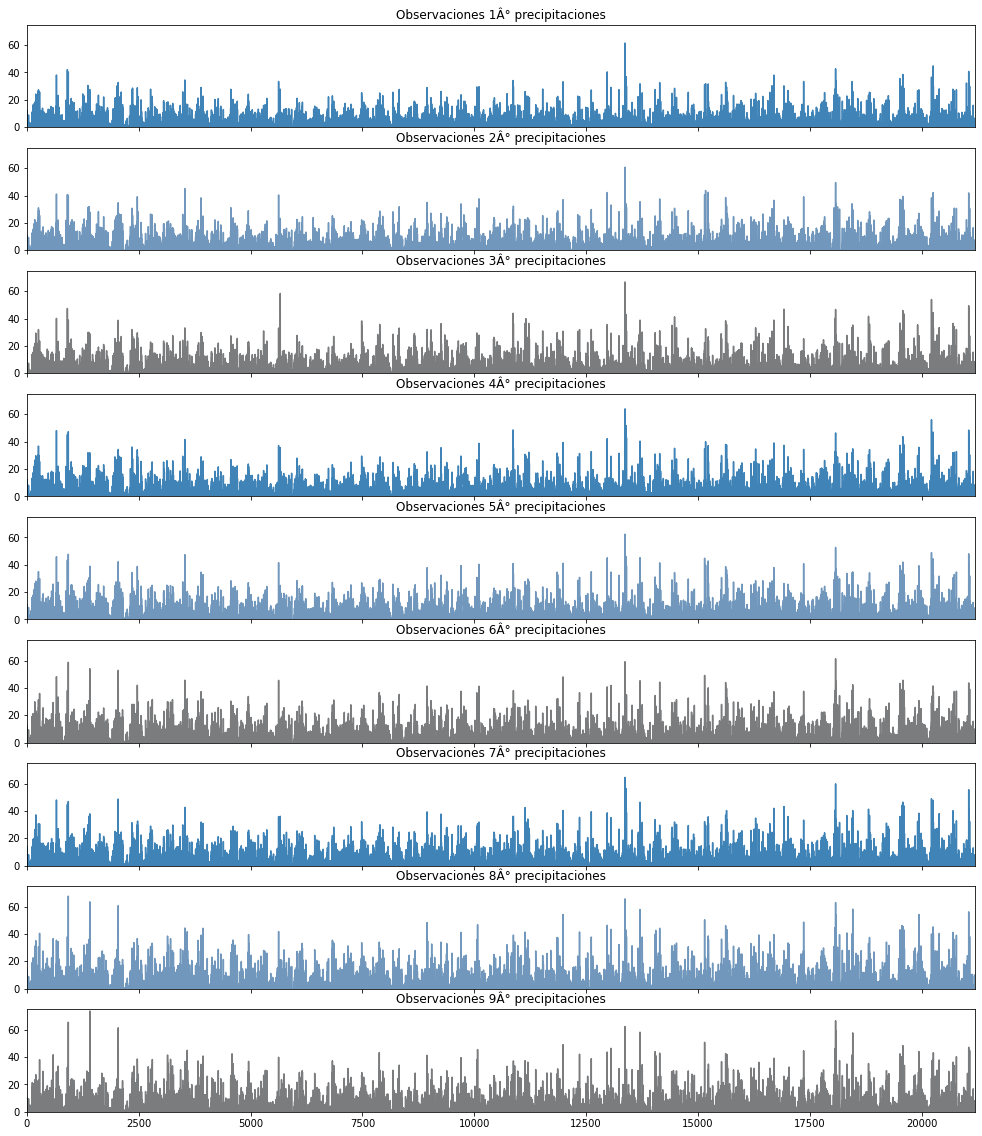

flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB


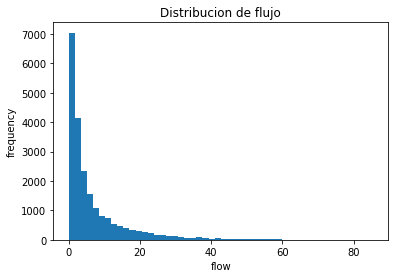

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-null  float64       
 4   obs_tas_5  21546 non-null  float64       
 5   obs_tas_6  21546 non-null  float64       
 6   obs_tas_7  21546 non-null  float64       
 7   obs_tas_8  21546 non-null  float64       
 8   obs_tas_9  21546 non-null  float64       
 9   obs_pr_1   21546 non-null  float64       
 10  obs_pr_2   21546 non-null  float64       
 11  obs_pr_3   21546 non-null  float64       
 12  obs_pr_4   21546 non-null  float64       
 13  obs_pr_5   21546 non-null  float64       
 14  obs_pr_6   21546 non-null  float64       
 15  obs_pr_7   21546 non-null  float64       
 16  obs_pr_8   21546 non-null  float64      

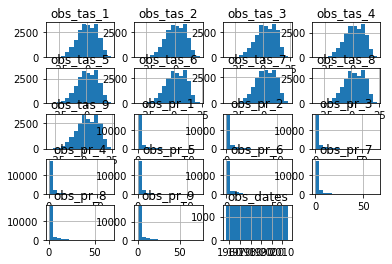

La fecha del registro 8777 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 9495 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 10723 no está en los datos de temperaturas y precipitaciones.
(21178, 2)
(21178, 19)


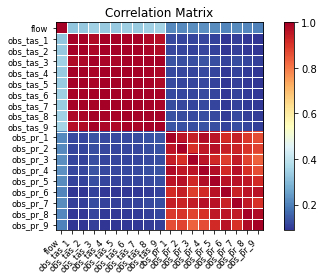

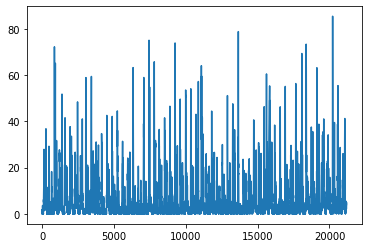

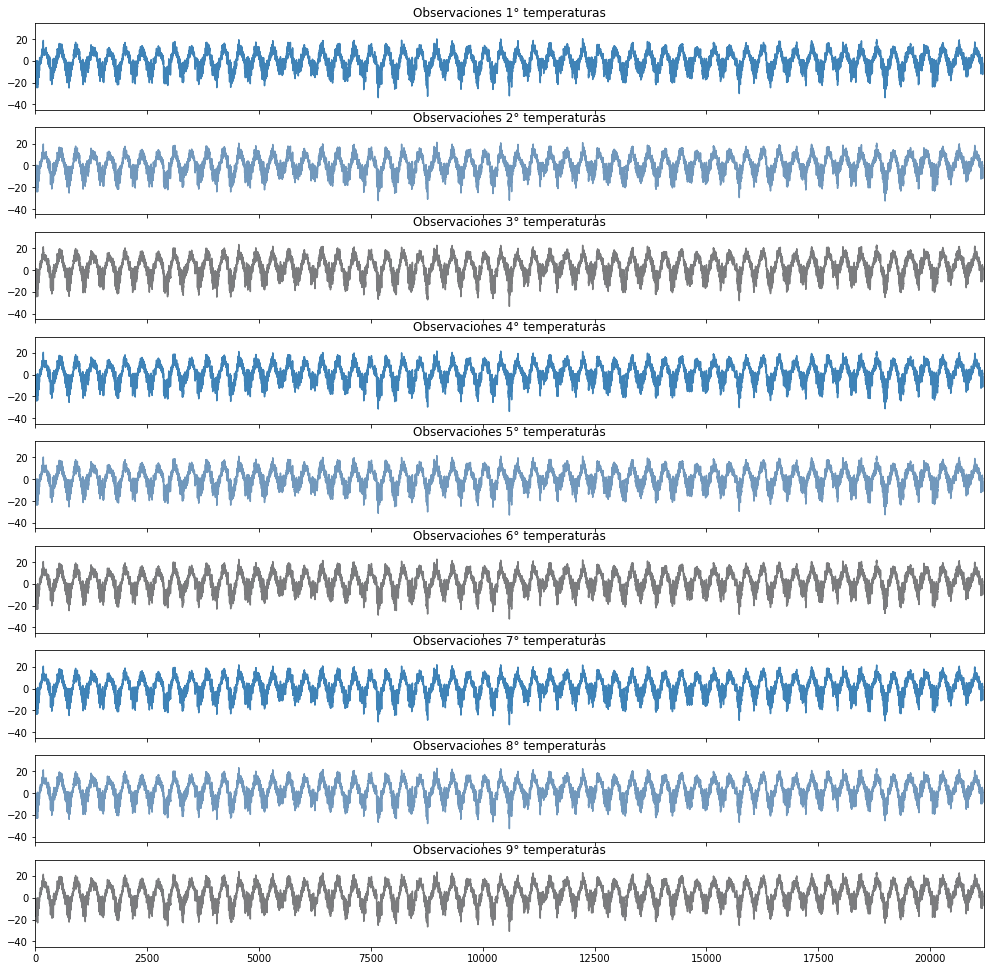

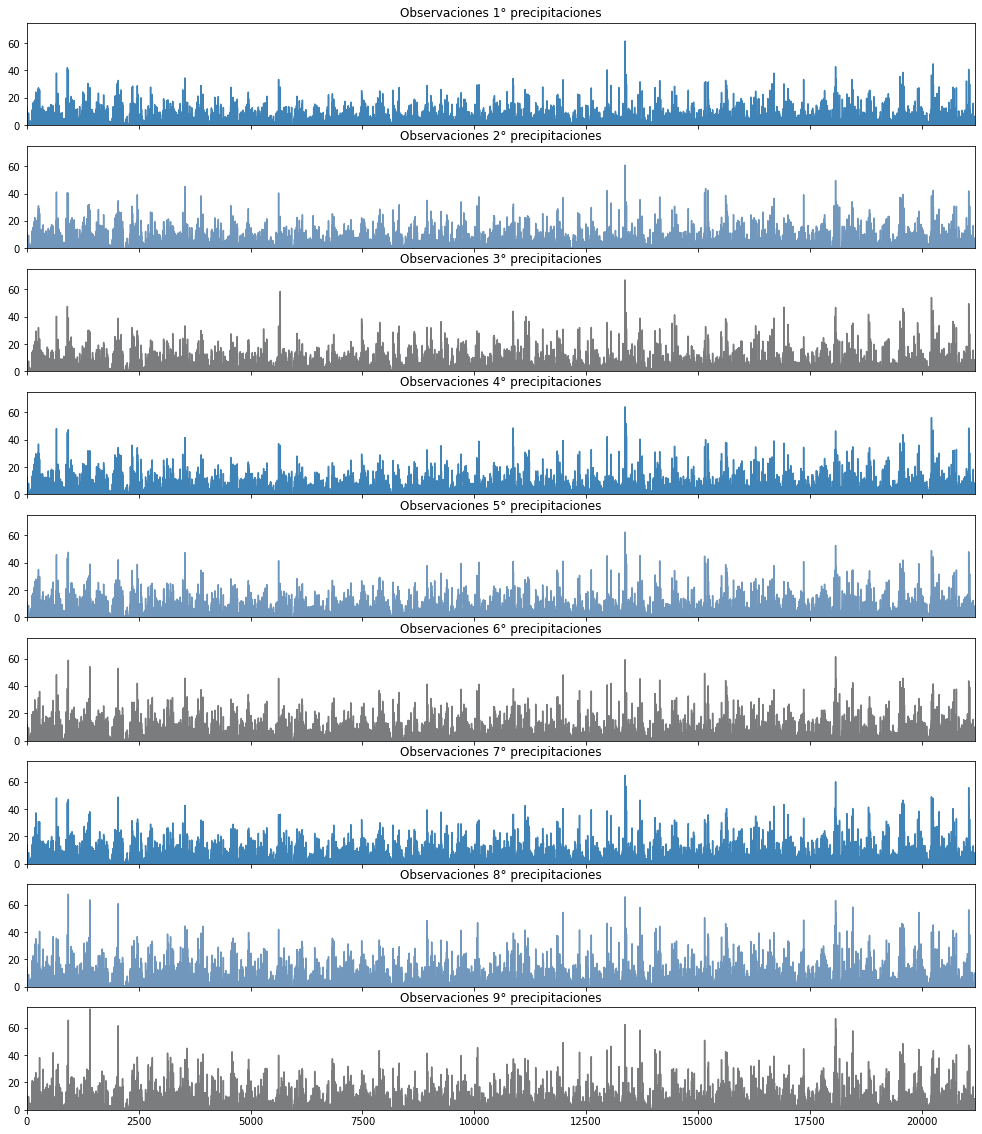

In [3]:
import ipynb.fs.full.Analisis
%run Analisis.ipynb

In [11]:
from sklearn.cluster import KMeans


In [4]:
full_data

,flow,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
0,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958-01-04
1,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1,1958-01-05
2,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5,1958-01-06
3,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7,1958-01-07
4,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5,1958-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27
21174,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28
21175,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29
21176,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
K = 4

In [7]:
all_obs= full_data.iloc[:,1:-1]

In [8]:
all_obs

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9
0,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1
2,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5
3,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7
4,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0
21174,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1
21175,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0
21176,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6


In [12]:
kmeans_all_obs = KMeans(n_clusters=4).fit(all_obs)

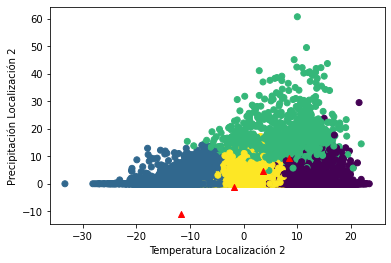

In [19]:
plt.scatter(all_obs.iloc[:,2],all_obs.iloc[:,10],c = kmeans_all_obs.labels_)
centers = kmeans_all_obs.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.xlabel("Temperatura Localización 2")
plt.ylabel("Precipitación Localización 2")
plt.show()

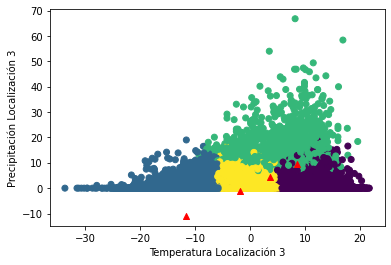

In [21]:
plt.scatter(all_obs.iloc[:,3],all_obs.iloc[:,11],c = kmeans_all_obs.labels_)
centers = kmeans_all_obs.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.xlabel("Temperatura Localización 3")
plt.ylabel("Precipitación Localización 3")
plt.show()

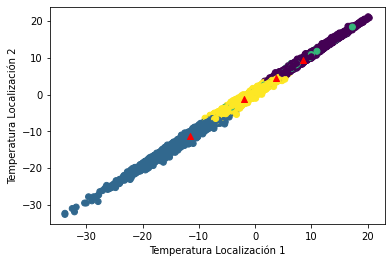

In [22]:
plt.scatter(all_obs.iloc[:,0],all_obs.iloc[:,1],c = kmeans_all_obs.labels_)
centers = kmeans_all_obs.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.xlabel("Temperatura Localización 1")
plt.ylabel("Temperatura Localización 2")
plt.show()

In [ ]:
plt.scatter(all_obs.iloc[:,0],all_obs.iloc[:,8],c = kmeans_all_obs.labels_)
centers = kmeans_all_obs.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.xlabel("Temperatura Localización 1")
plt.ylabel("Temperatura Localización 9")
plt.show()

In [27]:
flow_obs= full_data.iloc[:,0:-1]
kmeans_flow_obs = KMeans(n_clusters=4).fit(flow_obs)

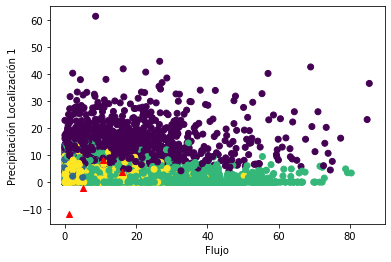

In [28]:
plt.scatter(flow_obs.iloc[:,0],flow_obs.iloc[:,10],c = kmeans_flow_obs.labels_)
centers = kmeans_flow_obs.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.xlabel("Flujo")
plt.ylabel("Precipitación Localización 1")
plt.show()